## 1. Memory Management

Computer memory is organized into a sequence of **words**, each of which typically consists of 4, 8, 16 bytes(depending on the computer).

These memory words are numbered from 0 to N-1, where N is the number of memory words available to the computer.
    - Memory Address
    
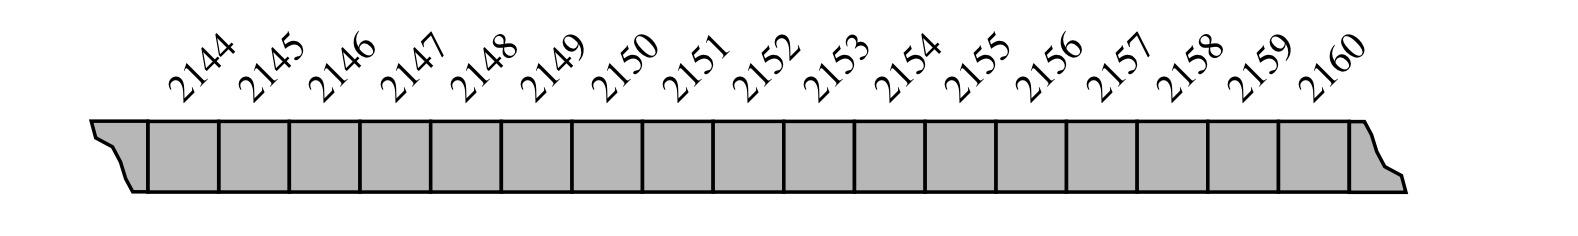

### 1.1 Memory Allocation

#### Memory Heap/ Python Heap

With Python, all objects are stored in a pool of memory
    - This pool is known as Memory Heap
    
The Python interpreter is responsible for:
    - negotiating the use of space with the operating system
    - managing the use of the memory heap
    
#### blocks

The storage available in the memory heap is divided into blocks
    - contiguous array-like 'chunks' of memory
    - may be of variable or fixed sizes
    
    
#### free list

A popular method to keep contiguous 'holes' of available free memory in a linked list.
    - The linkes joining these holes are stored inside the holes themselves, as their memory is not being used
    
#### fragmentation

As memory is allocated and deallocated, the collection of holes in the free lists changes, with the unused memory being separated into disjoint holes divided by blocks of used memory.

It becomes difficult to find large continuous chunks of memory, even though an equivalent amount of memory may be unused.
    - Fragmented so not able to use

Minimize fragmentation as much as possible

1. Internal fragmentation
    - when a portion of an allocated memory block is unused
    - Request an array of size 1000, but only use the first 100 cells of this array
    - Not much a run-time environment can do to reduce internal fragmentation
    

2. External fragmentation
    - There is a significant amount of unused memory between several contiguous blocks of allocated memory
    - The run-time environment should allocate memory in a way to try to reduce external fragmentation as much as reasonably possible
    
#### Algorithms to minimize external fragmentation

In each algorithm, the requested amount of memory is subtracted from the chosen memory hole, and the leftover part of that hole is returned to the free list.

1. best-fit-algorithm
    - Searches the entire free list to find the hole whose size is closest to the amount of memory being requested
    - Slow
    - The leftover part of the used hole tends to be small
    
    
2. first-fit-algorithm
    - Searches from the begining of the free list for the first hole that is large enough
    - Fast
    - Produce a lot of external fragmentation at the front of the free list, which slows down future searches
    
    
3. next-fit-algorithm
    - Like first-fit, also searches from the begining, but it begins its search from where it left off previously, viewing the free list as a circularly linked list
    - Spread the fragmentation more evenly throughout the memory heap, keep search times low
    - More difficult to allocate large blocks
    
    
4. worst-fit-algorithm
    - Searches the free list to find the largest hole of available memory, faster if list was maintained as a priority queue
    - Keep contiguous section of free memory as large as possible

### 1.2 Garbage Collection

The process of detecting 'stale' objects, deallocating the space devoted to those objects, and returning the reclaimed space to the free list.

#### Detect the objects that are no longer necessary

Live objects:
    - A program can access those object, which means it must have a direct or indirect reference to those object

1. Direct reference
    - There is an identifier in an active namespace
        - The global namespace
        - The local namespace for any active function
    - w = Widget(), the identifier w will be defined in the current namespace as a reference to the new widget object
    - Root Objects:
        - All objects with direct references
        
        
2. Indirect reference
    - A reference that occurs within the state of some other live object
    - w = Widget(), w.namelist, the namelist is an attribute of the Widget object, then the namelist is a live object with indirect reference w
    - Any objects that are referenced within this namelist, are also live object with indirect reference
    

The objects that are not live objects should be garbage collected.

#### Strategies for determining which objects are live

1. Reference Counts

Reference Counts:
    - Within the state of every Python object, is an integer known as its reference count
    - The count of how many references to the object exist anywhere in the system
    - The maintenance of a reference count for each object add O(1) space per object, and the increment and decrements to the count add O(1) additional computation time per such operations
    

Within the *sys* module there is a function named getrefcount, that returns the reference count for the object sent as a parameter.
    - The formal parameter of that function is assigned to the actual parameter sent by the caller, so there is one additional reference to that object in the local namespace of the function.
    

If an object's count is ever deremented to zero, the system can immediately deallocate the object.


2. Cycle Detection

For the objects that have references, but not reachable from a root object.

When the available space in the memory heap is becoming scarce, the Python interpreter implemente cycle detection.
    - To reclaim objects that are unreachable, despite their nonzero reference counts.

#### The Mark-Sweep Algorithm for Cycle Detection

Associate a 'mark' bit with each object that identifies whether that object is live.

When the garbage collection is needed, suspend all other activity and clar the mark bits of all the objects currently allocated in the memory heap. Perform Mark-Sweep, then resume the suspended program.

**Mark:**
    - Trace through the active namespace and mark all the root objects as live
    - Perform a Depth-first search from each root object, and identify and mark each live object
    

**Sweep:**
    - Scan through the memory heap and reclaim any space that is being used for an object that has not been marked.
    - Optionally: Coalesce all the allocated space in the memory heap into a single block, to eliminate external fragmentation.
    
    
**Performing DFS In-Place**

Simulate the recursion stack using the edges of the graph
    - which in the case of garbage collection correspond to object references
    
When we traverse an edge from a visited vertex v to a new vertex w, we change the edge (v, w) stored in v’s adjacency list to point back to v’s parent in the DFS tree. 

When we return back to v (simulating the return from the “recursive” call at w), we can then switch the edge we modified to point back to w, assuming we have some way to identify which edge we need to change back.

### 1.3 Additional Memory Used by the Python Interpreter

#### The Run-Time Call Stack

Call stack/Python interpreter stack:
    - A private stack of a running python program
    - Used to keep track of the nested sequence of currently active invocations of functions
    - Each entry of the stack is a structure known as an activation record or frame, storing information about an invocation of a function
    - Top of stack:
        - Running call, the function activation currently control the execution
    - Remaining of stack:
        - Suspended call, the functions that have invoked another function and are currently waiting for that other function to return control when it terminates
        
        
Activation record:
    - Each includes a dictionary representing the local namespace for the function call.
    - The namespace maps identifiers, to object values
    - The activation record also includes a reference to the function definition, and a special variable: 
        - program counter: Maintain the address of the statement within the function that is currently executing
        - When one function returns control to another, the stored program counter for the suspended function allows the interpreter to properly continue execution of that function.
        
        
#### Implementing Recursion

Using a stack to implement the nesting of function calls allows programs to use recursion.

#### The Operand Stack

Arithmetic expressions, are evaluated by the interpreter using an operand stack.

## 2. Memory Hierarchies and Caching

### 2.1 Memory Systems

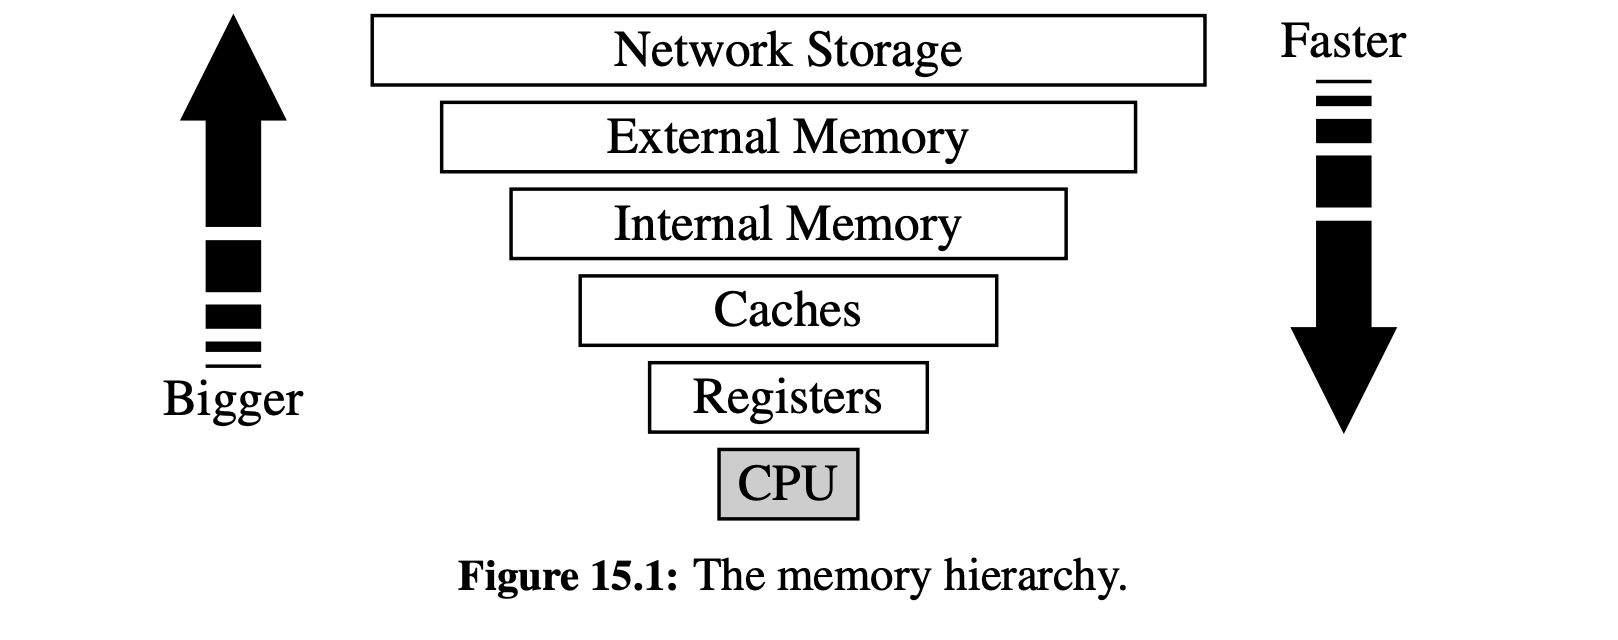

Internal Memory:
    -  or Main memory or core memory
    
External Memory:
    - consists of disks, CD drives, DVD drives or tapes
    - Access time for the general-purpose external-memory device, are typically as much as 100000 to 1000000 times longer than those for internal memory

### 2.2 Caching Strategies

The bottleneck often occurs between two levels of the memory hierarchy
    - The one can hold all data items and the level just below
    
After optimized the software for a certain architecture configuration, to accelerate its performance due to the memory access, it will no longer be device-independent.
    
#### Caching and Blocking

Operating system designers have developed general mechanisms that allow most memory accesses to be fast.

These mechanisms are based on two important **locality-of-reference** properties that most software possesses:

1. Temporal Locality
    - If a program accesses a certain memory location, then there is increased likelihood that it accesses that same location again in the near future.


2. Spatial Locality
    - If a program access a certain memory location, then there is increased likelihood that it soon accesses other locations that are near this one.
    
Temporal and spatial localities give rise to two fundamental design choices for multilevel computer memory systems:
    - interface between cache and internal memory, and interface between internal and external memory
    
1. Virtual Memory: Caching
    - Motivated by temporal locality
    - Consists of:
        - Providing an address space as large as the capacity of the secondary-level memory
        - Transferring data located in the secondary level into the primary level, when they are addressed
    - Caching:
        - Bringing data into primary memory
        - So it will be able to respond quickly to all the requests for this data in the near future
        

2. Blocking:
    - Motivated by spatial locality
    - If data stored at a secondary-level memory location l is accessed, then bring into primary-level memory a large block of contiguous locations that include the location l
    - Block Type:
        - Cache lines: interface between cache and internal memory
        - Pages: interface between internal and external memory

Because primary-level memory is much smaller than secondary-level memory, any program will likely reach a point where it requests data from secondary-level, but primary memory is already full of blocks.
    - Must remove some block from primary memory
    
#### Caching in Web Browsers

When revisiting information presented in Web pages. To exploit temporal locality of reference, it is often advantageous to store copies of Web pages in a cache memory. 

This effectively creates a two-level memory hierarchy
    - The cache serving as the smaller, quicker internal memory
    - The network being the external memory. 
    
In particular, suppose we have a cache memory that has m “slots” that can contain Web pages. We assume that a Web page can be placed in any slot of the cache. 
    - This is known as a fully associative cache.

#### Page Replacement Algorithm

1. First-in, First-out(FIFO)
    - Evict the page that has been in the cache the longest
    

2. Least recently used(LRU)
    - Evict the page whose last request occured furthest in the past
    - Involves updateing the priority of existing pages
    - Has the most overhead to implement

    
3. Random
    - Evict a random page from the cache
    
In experimental comparisons:
    - Performance: LRU > FIFO > Random

## 3. External Searching and B-Trees

For the problem of maintaining a large collection of items that does not fit in main memory
    - Such as a typical database
    - We refer the secondary-memory blocks as disk blocks. The transfer of a block between secondary memory and primary memory as a disk transfer. 
    - The main goal of maintaining such a collection in external memory is to minimize the number of disk transfers needed to perform a query or update. 
        - the I/O complexity
        
#### Some Inefficient External-Memory Representations

For a typical operation:
    - search for a key in a map. 
    - A map of n items unordered in a doubly linked list, searching for a particular key within the list requires n transfers in the worst case
        - since each link hop we perform on the linked list might access a different block of memory.
    
1. array-based sequence to reduce the number of block transfers
    - only O(n/B) block transfers, where B denotes the number of elements that fit into a block.
    - the bound of O(n/B) transfers is only achieved when using a compact array representation
    - For a referential container, like Python list, the actual element are not generally stored sequentially in memory, still resulting the n transfers in the worst case
    

2. Sorted array to reduce the number of block transfers
    - a search performs O(log2 n) transfers, via binary search
    - but each query during a binary search is likely in a different block of the sequence.

### 3.1 (a, b) Trees

(a, b) tree:
    - is a generalization of the (2, 4) tree data structure.
    - A multiway search tree such that each node has between a and b children, and stores between a-1 and b-1 entries
    
By setting the parameters a and b appropriately with respect to the size of disk blocks, we can derive a data structure that achieves good external-memory performance.

#### Definition of an (a, b) Tree

1. a and b:
    - 2 <= a <= (b + 1) / 2
    

2. Size Property:
    - Each internal node has at least 'a' children, unless it is the root, and has at most b children
    

3. Depth Property
    - All the external nodes have the same depth

The height of an (a, b) tree storing n entris is $\Omega(logn/logb)$ and $O(logn/loga)$

### 3.2 B-Trees

The best-known method for maintaining a map in external memory.

A **B-tree of order d**: is a (a,b) tree with a = $\lceil d/2\rceil$ and b = d

We can choose d so that 
    - the d children references and the d − 1 keys stored at a node can fit compactly into a single disk block
    - implying that d is proportional to B. 
    - Thus, f (b) and g(b) are both O(1)
        - for each time we access a node to perform a search or an update operation, we need only perform a single disk transfer

#### Performance

A B-tree with n entries 
    - has I/O complexity O(logn/logB) for search or update operation
    - uses O(n/B) blocks, where B is the size of a block.

## 4. External-Memory Sorting

### Multiway-Merge-Sort

Divide the set S of n objects into *d* subsets of roughly equal size

The total number of transfers performed by this algorithm is:
    - If the merge process using only O(n/B) disk transfers

$$t(n) = d * t(n/d) + cn/B$$

We can stop the recursion when n ≤ B, since we can perform a single block transfer at this point, getting all of the objects into internal memory, and then sort the set with an efficient internal-memory algorithm.

Choose M to be the size of the internal memory
$$d = (M/B) − 1$$

### Multiway Merging

Given an array-based sequence S of n elements stored compactly in external memory, we can sort S with 
    - O((n/B) log(n/B)/ log(M/B)) block transfers
    - O(nlogn) internal computations
    - M is the size of the internal memory and B is the size of a block.